## Small Truss

Joint: 0 Fx=0, Fy=-28.0
Joint: 1 Fx=0, Fy=-28.0
Joint: 2 Fx=0, Fy=0


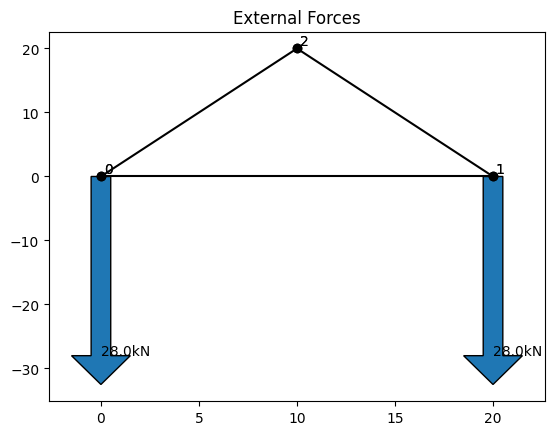

560.0 = 20N_{1y}\\
0 = 1.0F_{01} + 0.447F_{02} + 1N_{0x}\\
28.0 = 0.894F_{02} + 1N_{0y}\\
0 = 1.0F_{01} + -0.447F_{12}\\
28.0 = 1N_{1y} + 0.894F_{12}\\
0 = 0.447F_{02} + -0.447F_{12}\\
N_{1y} = 28.0 \\
F_{01} = 0.0 \\
F_{02} = 0.0 \\
N_{0y} = 28.0 \\
N_{0x} = 0.0 \\
F_{12} = 0.0 \\


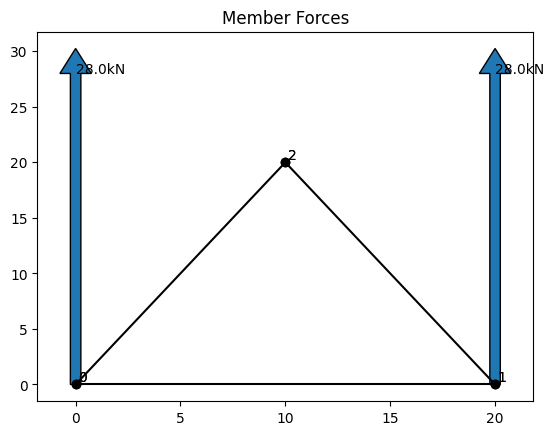

In [1]:
from truss import *

TRAIN_WEIGHT_PER_M = 4 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.ROLLER, 20, 0, grounded=True), # 1
    Joint(JointType.GUSSET, 10, 20)] # 3
links = [(0, 1), (1,2), (0,2)]

train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.print_forces()
truss.plot("External Forces", plot_external=True, plot_member=False)
truss.solve()
truss.plot("Member Forces", plot_external=False, plot_member=True)

## Medium Truss

/tmp/ipykernel_1647/321029164.py:39: OptimizeWarning: Unknown solver options: xatol
  res = minimize(optimize_cost, x0, method='powell',


Optimization terminated successfully.
         Current function value: 750.486878
         Iterations: 3
         Function evaluations: 136
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 750.4868779754822
       x: [ 7.000e+00 -4.900e+00]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 136


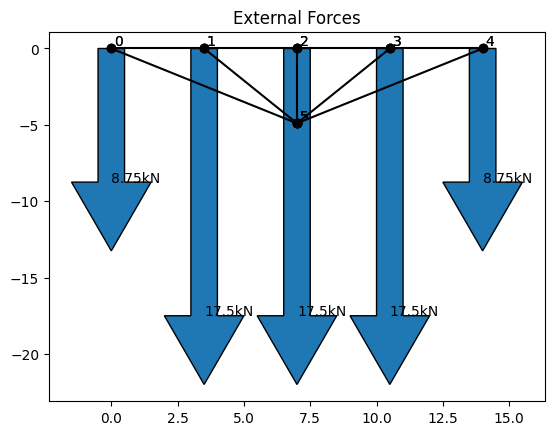

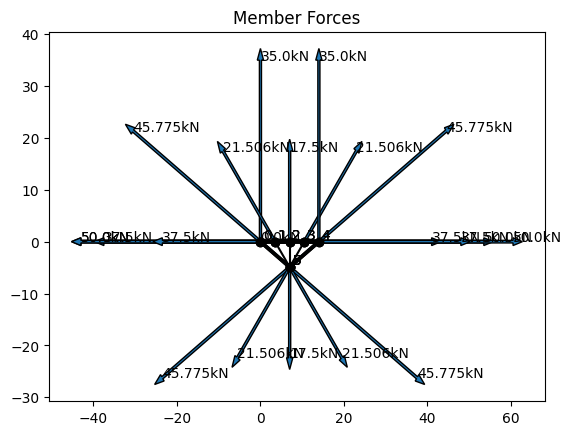

Final Cost: 750.4868779754822


In [7]:
from truss import *
from scipy.optimize import minimize


TRAIN_WEIGHT_PER_M = 5 # kN/m
BRIDGE_LENGTH = 14 # m

def optimize(xs, ys):
    joints = [
        Joint(JointType.PIN, 0, 0, grounded=True),  # 0
        Joint(JointType.GUSSET, 3.5, 0), # 1
        Joint(JointType.GUSSET, 7, 0), # 2
        Joint(JointType.GUSSET, 10.5, 0), # 3
        Joint(JointType.ROLLER, 14, 0, grounded=True), # 4
        Joint(JointType.GUSSET, xs[0], ys[0])] # 5
        # Joint(JointType.GUSSET, xs[1], ys[1]), # 6
        # Joint(JointType.GUSSET, xs[2], ys[2]), # 7
        # Joint(JointType.GUSSET, xs[3], ys[3])] # 8
    # links = [(0, 1), (1,2), (2,3), (3,4), (0,5), (1,5), (1,6), (2,6), (2,7), (3,7), (3,8), (4,8), (5,6), (6,7), (7,8)]
    links = [(0, 1), (1,2), (2,3), (3,4), (0,5), (1,5), (2,5), (3,5), (4,5)]
    train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2, 3, 4])
    forces = [train_force]

    truss = Truss(joints, links, forces)
    truss.apply_external_forces()

    cost, success = truss.solve()
    return cost, success, truss 


def optimize_cost(xs):
    split = np.split(xs, 2)
    cost, _, _ = optimize(split[0], split[1])
    return cost


cost, success, truss = optimize([1.75, 5.25, 8.75, 12.25], [-10, -10, -10, -10])
x0 = np.array([7, -10])
res = minimize(optimize_cost, x0, method='powell',
               options={'xatol': 1e-8, 'disp': True})

print(res)

split = np.split(res.x, 2)
cost, success, truss = optimize(split[0], split[1])
truss.plot("External Forces", plot_external=True, plot_member=False)
truss.plot("Member Forces", plot_external=False, plot_member=True)
print("Final Cost: " + str(cost))

## Large Truss

Joint: 0 Fx=0, Fy=-2.8000000000000003
Joint: 1 Fx=0, Fy=-5.6000000000000005
Joint: 2 Fx=0, Fy=-5.6000000000000005
Joint: 3 Fx=0, Fy=-5.6000000000000005
Joint: 4 Fx=0, Fy=-5.6000000000000005
Joint: 5 Fx=0, Fy=-5.6000000000000005
Joint: 6 Fx=0, Fy=-5.6000000000000005
Joint: 7 Fx=0, Fy=-5.6000000000000005
Joint: 8 Fx=0, Fy=-5.6000000000000005
Joint: 9 Fx=0, Fy=-5.6000000000000005
Joint: 10 Fx=0, Fy=-2.8000000000000003
Joint: 11 Fx=0, Fy=0
Joint: 12 Fx=0, Fy=0
Joint: 13 Fx=0, Fy=0
Joint: 14 Fx=0, Fy=0
Joint: 15 Fx=0, Fy=0
Joint: 16 Fx=0, Fy=0
Joint: 17 Fx=0, Fy=0
Joint: 18 Fx=0, Fy=0
Joint: 19 Fx=0, Fy=0
Joint: 20 Fx=0, Fy=0


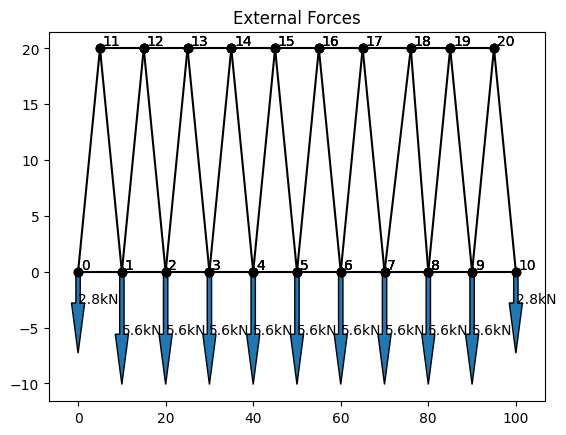

2800.0 = 100N_{10y}\\
0 = 1.0F_{01} + 0.243F_{011} + 1N_{0x}\\
2.8 = 0.97F_{011} + 1N_{0y}\\
0 = 1.0F_{01} + 1.0F_{12} + -0.243F_{111} + 0.243F_{112}\\
5.6 = 0.97F_{111} + 0.97F_{112}\\
0 = 1.0F_{12} + 1.0F_{23} + -0.243F_{212} + 0.243F_{213}\\
5.6 = 0.97F_{212} + 0.97F_{213}\\
0 = 1.0F_{23} + 1.0F_{34} + -0.243F_{313} + 0.243F_{314}\\
5.6 = 0.97F_{313} + 0.97F_{314}\\
0 = 1.0F_{34} + 1.0F_{45} + -0.243F_{414} + 0.243F_{415}\\
5.6 = 0.97F_{414} + 0.97F_{415}\\
0 = 1.0F_{45} + 0.243F_{516} + 1.0F_{56} + -0.243F_{515}\\
5.6 = 0.97F_{516} + 0.97F_{515}\\
0 = 1.0F_{56} + -0.243F_{616} + 0.243F_{617} + 1.0F_{67}\\
5.6 = 0.97F_{616} + 0.97F_{617}\\
0 = 1.0F_{67} + 1.0F_{78} + -0.243F_{717} + 0.287F_{718}\\
5.6 = 0.97F_{717} + 0.958F_{718}\\
0 = 1.0F_{78} + 1.0F_{89} + -0.196F_{818} + 0.243F_{819}\\
5.6 = 0.981F_{818} + 0.97F_{819}\\
0 = 1.0F_{89} + 1.0F_{910} + -0.243F_{919} + 0.243F_{920}\\
5.6 = 0.97F_{919} + 0.97F_{920}\\
0 = 1.0F_{910} + -0.243F_{1020}\\
2.8 = 1N_{10y} + 0.97F_{1020}\\
0

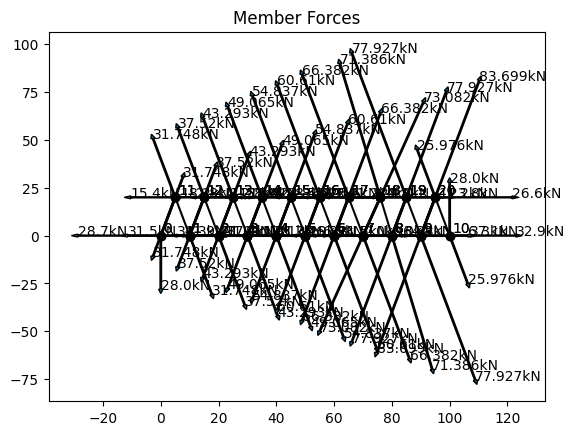

In [3]:
from truss import *

# 42 Unknowns

TRAIN_WEIGHT_PER_M = 4 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.GUSSET, 10, 0), # 1
    Joint(JointType.GUSSET, 20, 0), # 2
    Joint(JointType.GUSSET, 30, 0), # 3
    Joint(JointType.GUSSET, 40, 0), # 4
    Joint(JointType.GUSSET, 50, 0), # 5
    Joint(JointType.GUSSET, 60, 0), # 6
    Joint(JointType.GUSSET, 70, 0), # 7
    Joint(JointType.GUSSET, 80, 0), # 8
    Joint(JointType.GUSSET, 90, 0), # 9
    Joint(JointType.ROLLER, 100, 0, grounded=True), # 10 
    Joint(JointType.GUSSET, 5, 20), # 11
    Joint(JointType.GUSSET, 15, 20), # 12
    Joint(JointType.GUSSET, 25, 20), # 13
    Joint(JointType.GUSSET, 35, 20), # 14
    Joint(JointType.GUSSET, 45, 20), # 15
    Joint(JointType.GUSSET, 55, 20), # 16
    Joint(JointType.GUSSET, 65, 20), # 17
    Joint(JointType.GUSSET, 76, 20), # 19
    Joint(JointType.GUSSET, 85, 20), # 19
    Joint(JointType.GUSSET, 95, 20)] # 20 
links = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,10), (0,11), (1,11), (1,12), (2,12), (2,13), (3,13), (3,14), (4,14), (4,15), (5,15), (5,16), (6,16), (6,17), (7,17), (7,18), (8,18), (8,19), (9,19), (9,20), (10,20), (11,12), (12,13), (13,14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]

train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.print_forces()
truss.plot("External Forces", plot_external=True, plot_member=False)
truss.solve()
truss.plot("Member Forces", plot_external=False, plot_member=True)